In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline
import json
import glob
import numpy as np
from PIL import Image
import rasterio
from rasterio.mask import mask
from rasterio.plot import reshape_as_image
from rasterio.plot import show_hist
#from scipy.misc import imsave
from imageio import imwrite
from sklearn.cluster import DBSCAN
from shapely.geometry import box
Image.MAX_IMAGE_PIXELS = None
import tifffile as tiff

In [2]:
from src.preprocessing.visualisation import plot_rgb_hist, plot_rgb_boxes
from src.preprocessing.normalization import rgb_array, max_norm, perc_norm

In [5]:
liebre1_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebrepansharp.tif"
liebre1_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebre1_boxes.geojson"

## Liebre image 1

Normalize image array using to 0-255 using the 95th percentile as the maximum scaling value.

In [6]:
rgb_perc_norm = perc_norm(liebre1_image_path)

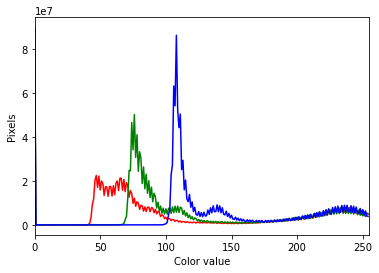

In [5]:
plot_rgb_hist(rgb_perc_norm, 255)

In [7]:
uint8_perc_norm = np.uint8(rgb_perc_norm)

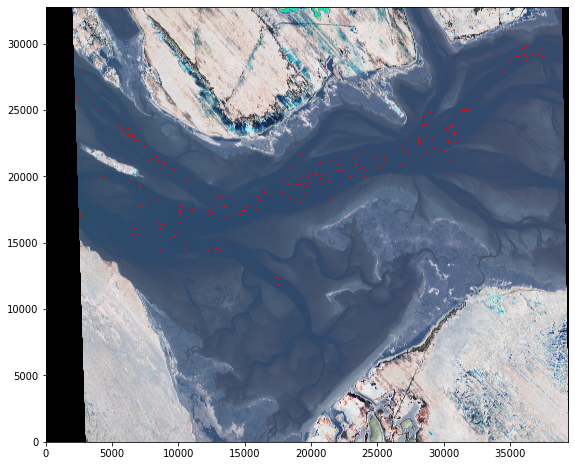

In [7]:
plot_rgb_boxes(liebre1_image_path, liebre1_box_path, uint8_perc_norm)

In [3]:
from src.preprocessing.dataprocessing import convert_coords, save_files, read_coords, get_bbox_info

In [9]:
image = Image.fromarray(uint8_perc_norm)
geo_image = rasterio.open(liebre1_image_path)

In [10]:
info = get_bbox_info(liebre1_box_path, image, geo_image)

In [12]:
print(len(info))

187


In [20]:
file_save_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images"

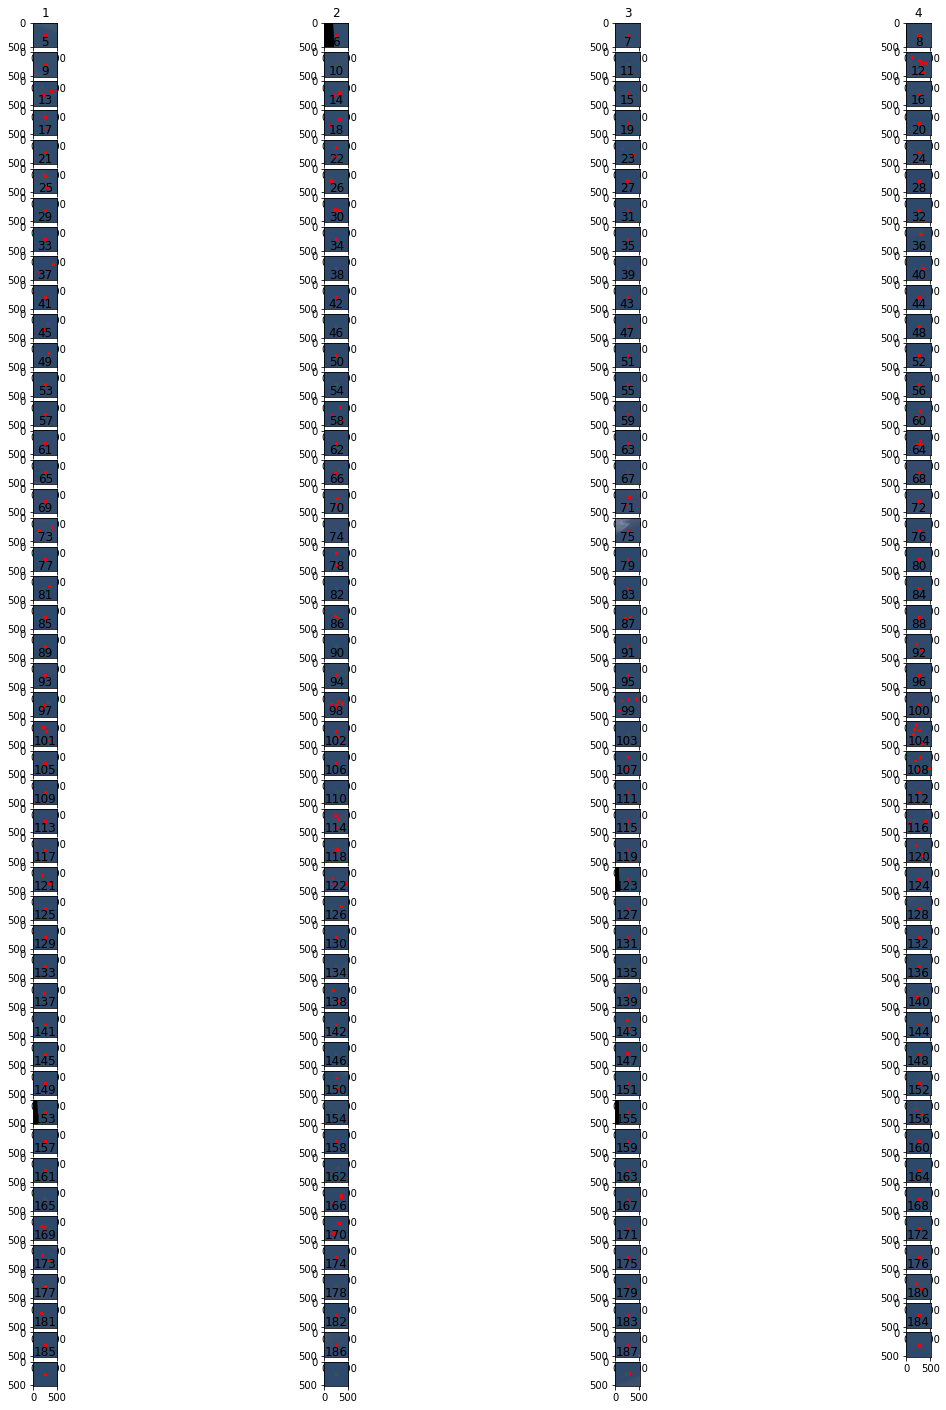

In [10]:
#save_files(image, info, file_save_path, 'liebre1')

In [4]:
#Visualise some of the saved files:
cropped_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images/liebre1_7.png"
cropped_label_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images/liebre1_7.txt"

In [5]:
cropped_image = Image.open(cropped_image_path)

In [6]:
import pandas as pd 
boxes = pd.read_csv(cropped_label_path, sep=" ", header=None)
boxes

,0,1,2,3,4
0,0,0.216797,0.197266,0.078125,0.078125
1,0,0.529297,0.326172,0.078125,0.078125
2,0,0.611328,0.441406,0.078125,0.078125
3,0,0.787109,0.433594,0.078125,0.078125
4,0,0.695312,0.794922,0.078125,0.078125
5,0,0.552734,0.333984,0.078125,0.078125
6,0,0.777344,0.419922,0.078125,0.078125


In [7]:
boxes[3][0]

0.078125

91.0
250.99999999999957
292.99999999999955
383.0
336.0
263.0
378.0


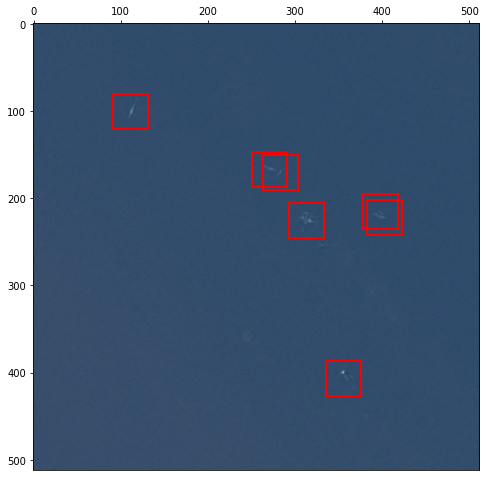

In [8]:
fig, ax = plt.subplots(figsize = (8,11))
ax.xaxis.tick_top()
ax.imshow(cropped_image)

for i in range(0,boxes.shape[0]):
    x = (boxes[1][i] - boxes[3][i]*0.5)*cropped_image.size[0]
    print(x)
    y = (boxes[2][i] - boxes[4][i]*0.5)*cropped_image.size[1]
    w = boxes[3][i] * cropped_image.size[0]
    h = boxes[4][i] * cropped_image.size[1]
    ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))

plt.show()



## Check Liebre 2 Image

In [9]:
#Visualise some of the saved files:
cropped_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images/liebre2_7.png"
cropped_label_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images/liebre2_7.txt"

In [10]:
cropped_image = Image.open(cropped_image_path)

In [11]:
import pandas as pd 
boxes = pd.read_csv(cropped_label_path, sep=" ", header=None)
boxes

,0,1,2,3,4
0,0,0.501953,0.498047,0.078125,0.078125


237.0


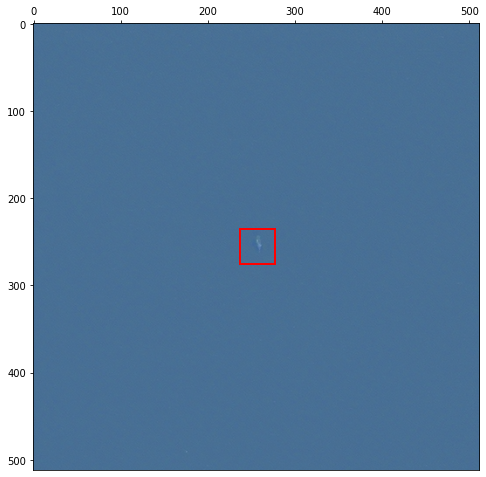

In [12]:
fig, ax = plt.subplots(figsize = (8,11))
ax.xaxis.tick_top()
ax.imshow(cropped_image)

for i in range(0,boxes.shape[0]):
    x = (boxes[1][i] - boxes[3][i]*0.5)*cropped_image.size[0]
    print(x)
    y = (boxes[2][i] - boxes[4][i]*0.5)*cropped_image.size[1]
    w = boxes[3][i] * cropped_image.size[0]
    h = boxes[4][i] * cropped_image.size[1]
    ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))

plt.show()



## San Ignacio Image

In [13]:
sanig_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/sanig_crop_final.tif"
sanig_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/sanig_boxes.geojson"

In [15]:
rgb_perc_norm_si = perc_norm(sanig_image_path)

In [16]:
uint8_perc_norm_si = np.uint8(rgb_perc_norm_si)

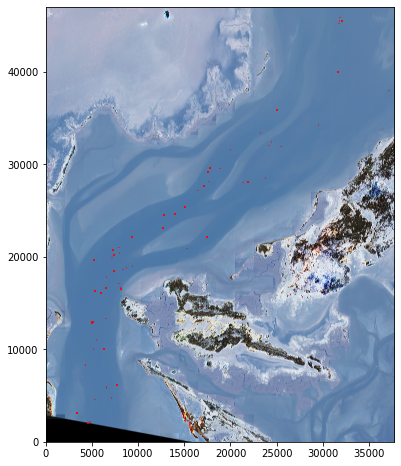

In [17]:
plot_rgb_boxes(sanig_image_path, sanig_box_path, uint8_perc_norm_si)

In [18]:
image_si = Image.fromarray(uint8_perc_norm_si)
geo_image_si = rasterio.open(sanig_image_path)

In [21]:
info_si = get_bbox_info(sanig_box_path, image_si, geo_image_si)

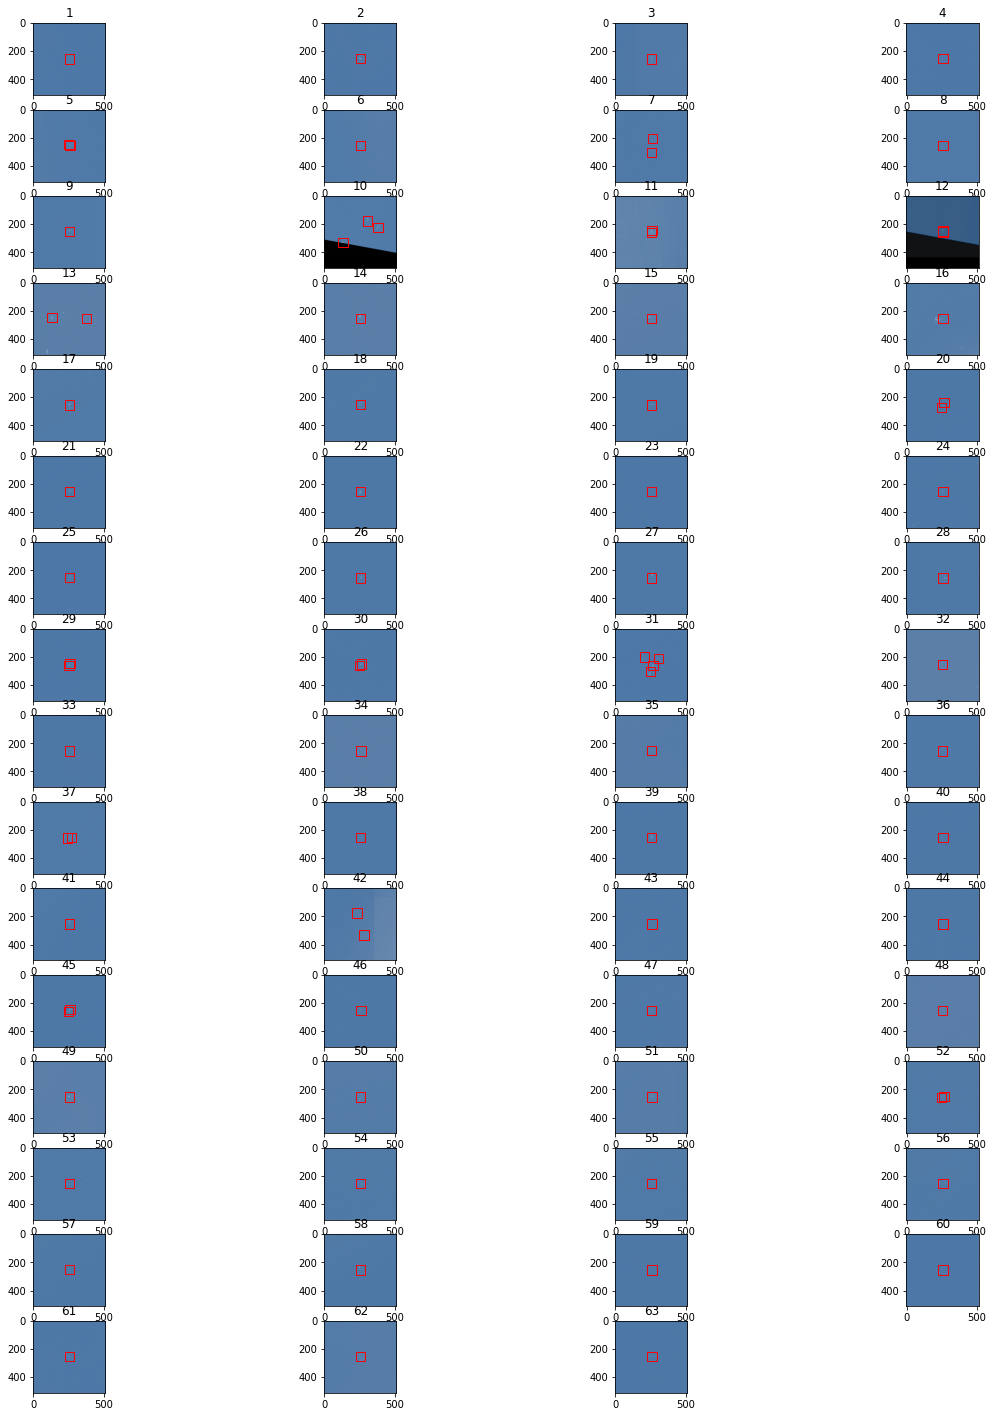

In [22]:
#save_files(image_si, info_si, file_save_path, 'sanig')

In [31]:
#Visualise some of the saved files:
cropped_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images/sanig_5.png"
cropped_label_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images/sanig_5.txt"

In [32]:
cropped_image = Image.open(cropped_image_path)

In [33]:
boxes = pd.read_csv(cropped_label_path, sep=" ", header=None)
boxes

,0,1,2,3,4
0,0,0.503906,0.494141,0.130208,0.130208


224.66666666666652


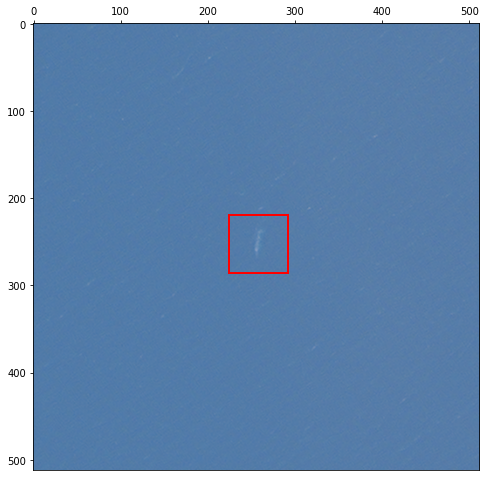

In [34]:
fig, ax = plt.subplots(figsize = (8,11))
ax.xaxis.tick_top()
ax.imshow(cropped_image)

for i in range(0,boxes.shape[0]):
    x = (boxes[1][i] - boxes[3][i]*0.5)*cropped_image.size[0]
    print(x)
    y = (boxes[2][i] - boxes[4][i]*0.5)*cropped_image.size[1]
    w = boxes[3][i] * cropped_image.size[0]
    h = boxes[4][i] * cropped_image.size[1]
    ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))

plt.show()